# **Breast Cancer Prediction**
- Wisconsin Breast Cancer Diagnostic Dataset

This database is also available through the UW CS ftp server:
ftp ftp.cs.wisc.edu
cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number
2) Diagnosis (M = malignant, B = benign)

## **Importing and Viewing Data**

In [87]:
# importing required libraries
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings("ignore")

# importing data
df = pd.read_csv('data.csv')
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [88]:
df.shape

(569, 33)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

## **Data Cleaning and Preprocessing**

In [90]:
df.drop('id',axis=1,inplace=True)
df.drop('Unnamed: 32',axis=1,inplace=True)
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [91]:
df.isna().sum()

diagnosis                  0
radius_mean                0
texture_mean               0
perimeter_mean             0
area_mean                  0
smoothness_mean            0
compactness_mean           0
concavity_mean             0
concave points_mean        0
symmetry_mean              0
fractal_dimension_mean     0
radius_se                  0
texture_se                 0
perimeter_se               0
area_se                    0
smoothness_se              0
compactness_se             0
concavity_se               0
concave points_se          0
symmetry_se                0
fractal_dimension_se       0
radius_worst               0
texture_worst              0
perimeter_worst            0
area_worst                 0
smoothness_worst           0
compactness_worst          0
concavity_worst            0
concave points_worst       0
symmetry_worst             0
fractal_dimension_worst    0
dtype: int64

- No null values

In [92]:
df.duplicated().sum()

0

- No duplicate values

In [93]:
df.diagnosis.unique()

array(['M', 'B'], dtype=object)

In [94]:
# encoding target variables
df['diagnosis'] = df['diagnosis'].map({'M':1,'B':0})
df.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### **Removing High Inter-Correlated Features**
Highly inter-correlated features can increase the overfitting, but that may not be the case always, so we will check for both the scenarios!

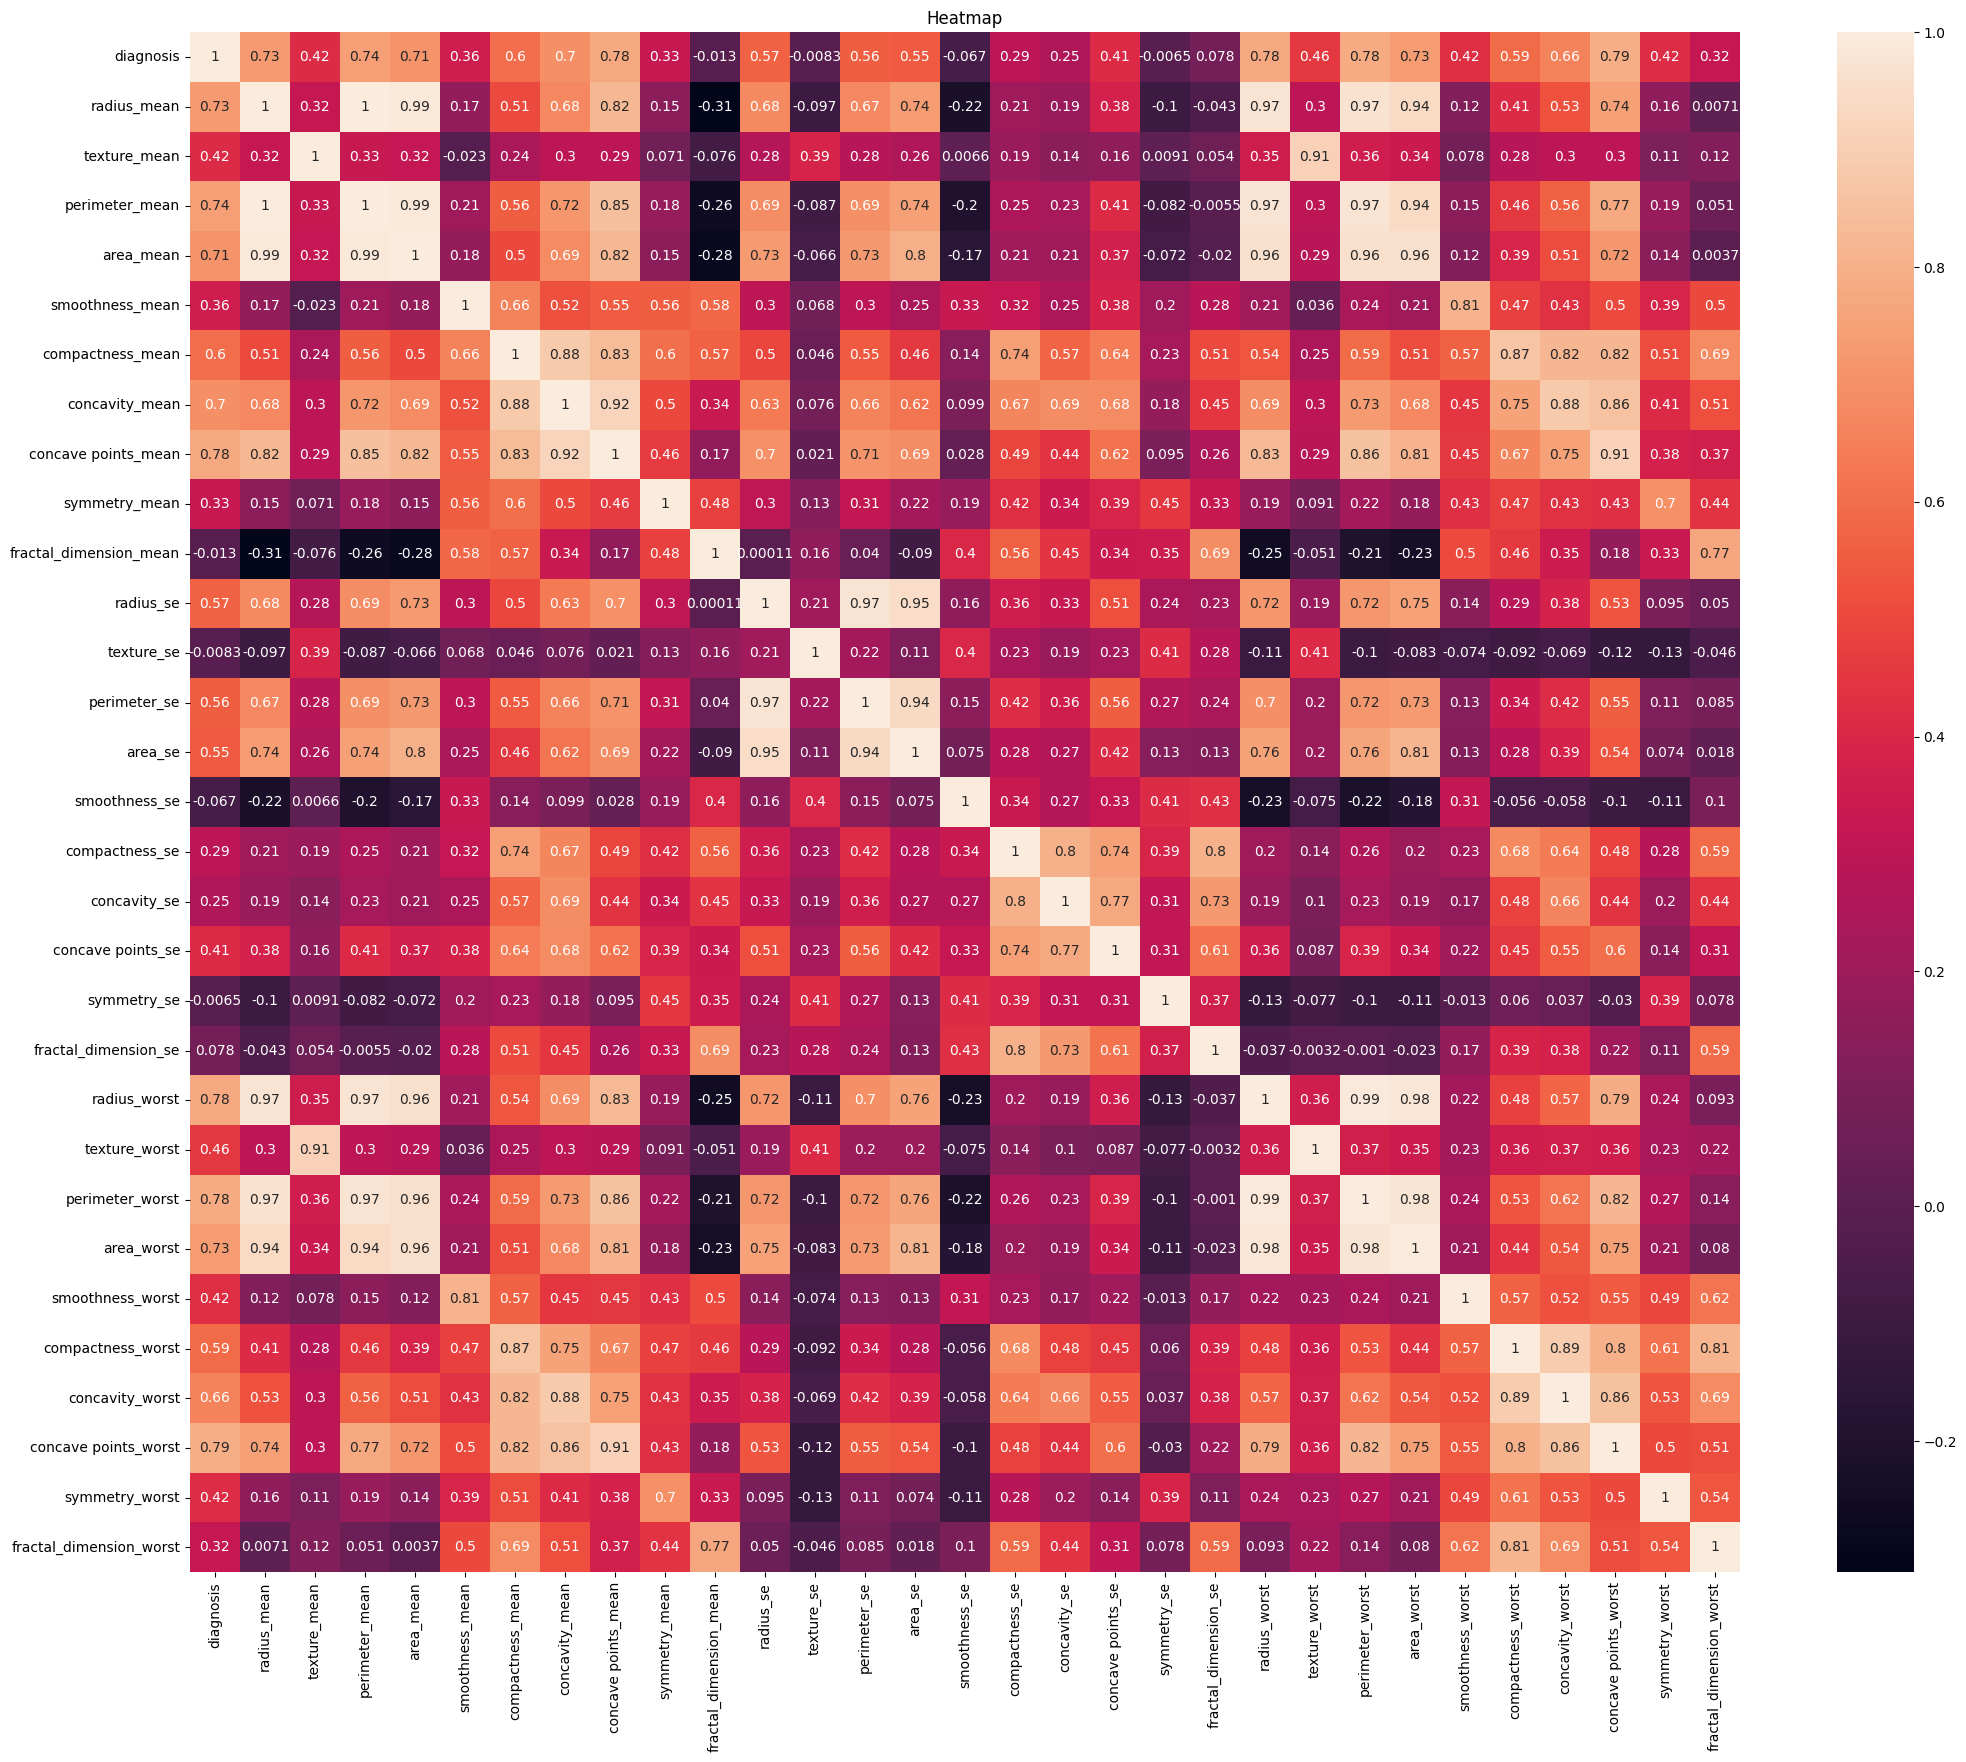

In [95]:
import seaborn as sns

plt.figure(figsize =(25,20))
sns.heatmap(df.corr(), annot=True)
plt.title("Heatmap")
plt.show()

In [130]:
corr_matix = df.corr()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
diagnosis,1.000000,0.730029,0.415185,0.742636,0.708984,0.358560,0.596534,0.696360,0.776614,0.330499,...,0.776454,0.456903,0.782914,0.733825,0.421465,0.590998,0.659610,0.793566,0.416294,0.323872
radius_mean,0.730029,1.000000,0.323782,0.997855,0.987357,0.170581,0.506124,0.676764,0.822529,0.147741,...,0.969539,0.297008,0.965137,0.941082,0.119616,0.413463,0.526911,0.744214,0.163953,0.007066
texture_mean,0.415185,0.323782,1.000000,0.329533,0.321086,-0.023389,0.236702,0.302418,0.293464,0.071401,...,0.352573,0.912045,0.358040,0.343546,0.077503,0.277830,0.301025,0.295316,0.105008,0.119205
perimeter_mean,0.742636,0.997855,0.329533,1.000000,0.986507,0.207278,0.556936,0.716136,0.850977,0.183027,...,0.969476,0.303038,0.970387,0.941550,0.150549,0.455774,0.563879,0.771241,0.189115,0.051019
area_mean,0.708984,0.987357,0.321086,0.986507,1.000000,0.177028,0.498502,0.685983,0.823269,0.151293,...,0.962746,0.287489,0.959120,0.959213,0.123523,0.390410,0.512606,0.722017,0.143570,0.003738
smoothness_mean,0.358560,0.170581,-0.023389,0.207278,0.177028,1.000000,0.659123,0.521984,0.553695,0.557775,...,0.213120,0.036072,0.238853,0.206718,0.805324,0.472468,0.434926,0.503053,0.394309,0.499316
compactness_mean,0.596534,0.506124,0.236702,0.556936,0.498502,0.659123,1.000000,0.883121,0.831135,0.602641,...,0.535315,0.248133,0.590210,0.509604,0.565541,0.865809,0.816275,0.815573,0.510223,0.687382
concavity_mean,0.696360,0.676764,0.302418,0.716136,0.685983,0.521984,0.883121,1.000000,0.921391,0.500667,...,0.688236,0.299879,0.729565,0.675987,0.448822,0.754968,0.884103,0.861323,0.409464,0.514930
concave points_mean,0.776614,0.822529,0.293464,0.850977,0.823269,0.553695,0.831135,0.921391,1.000000,0.462497,...,0.830318,0.292752,0.855923,0.809630,0.452753,0.667454,0.752399,0.910155,0.375744,0.368661
symmetry_mean,0.330499,0.147741,0.071401,0.183027,0.151293,0.557775,0.602641,0.500667,0.462497,1.000000,...,0.185728,0.090651,0.219169,0.177193,0.426675,0.473200,0.433721,0.430297,0.699826,0.438413


In [129]:
def select_low_correlation_with_first(df, threshold=0.75):
 
  # Select the first feature
  first_feature = df.iloc[:, 0]

  # Calculate correlation with the first feature
  correlations = df.drop(df.columns[0], axis=1).corrwith(first_feature).abs()

  # Filter features below the threshold
  filtered_features = correlations <= threshold

  # Return dataframe with filtered features
  return df[filtered_features]

# Example usage
data = df
low_corr_df = select_low_correlation_with_first(data)
print(low_corr_df.head())

IndexingError: Unalignable boolean Series provided as indexer (index of the boolean Series and of the indexed object do not match).

IndexError: index 10 is out of bounds for axis 0 with size 10

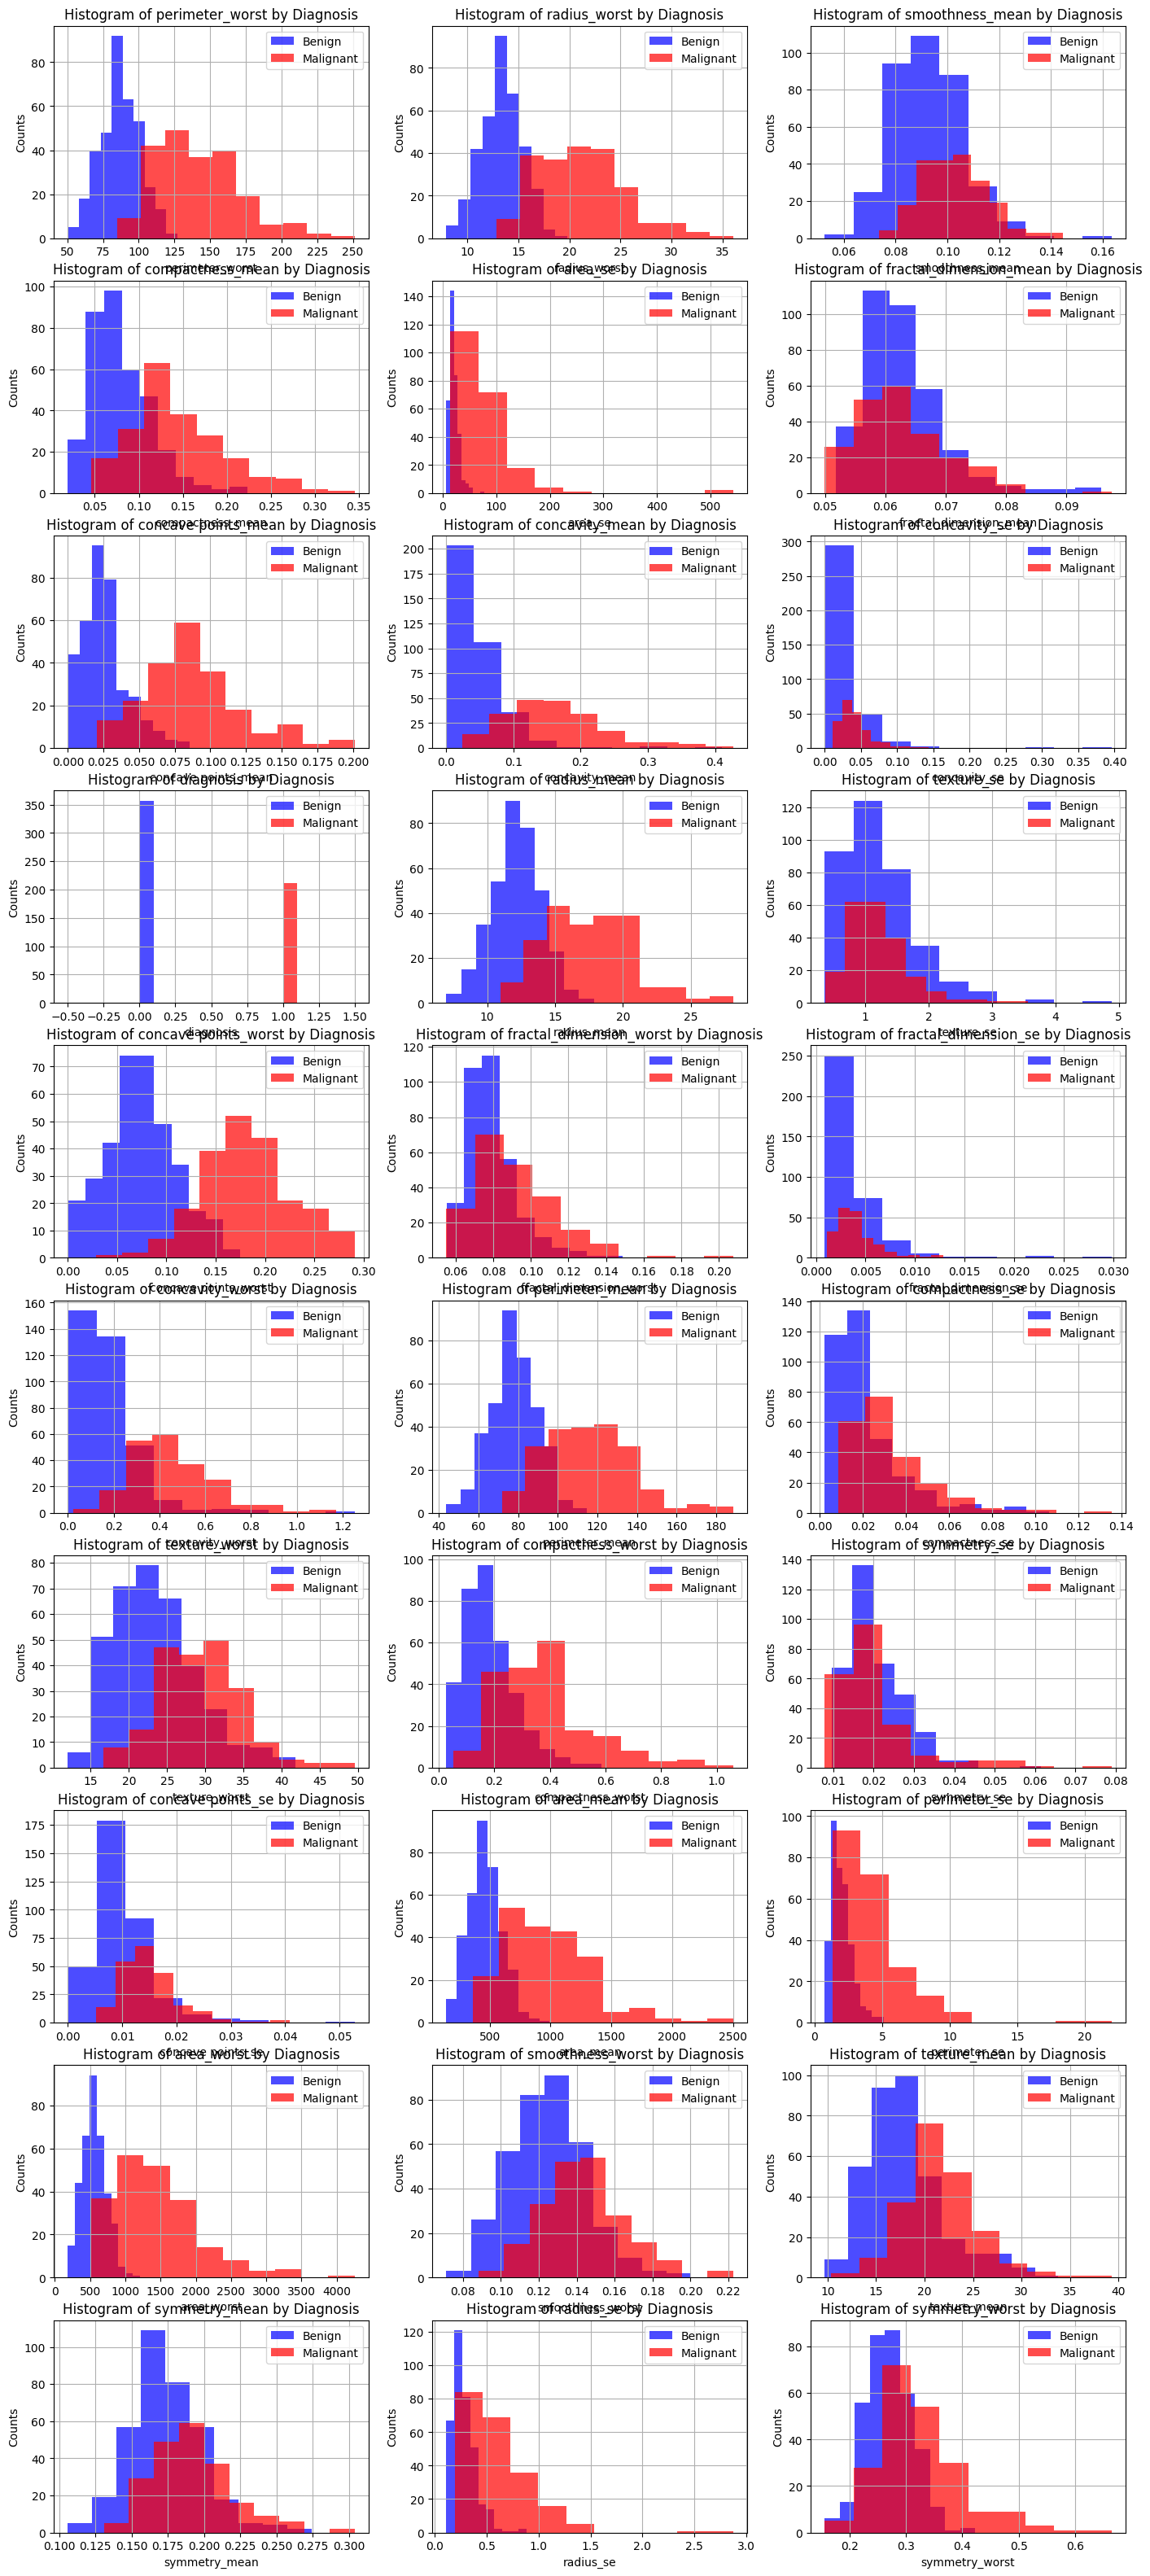

In [101]:
import matplotlib.pyplot as plt

# separate features and target variable
features = df[data]
diagnosis = df['diagnosis']

# create a subplot of 10x3
fig, axes = plt.subplots(10, 3, figsize=(17, 40))  # Adjust figsize for better visualization

# counter for subplot index
subplot_idx = 0

# loop through each feature
for col in features.columns:
  
  # plot histograms for diagnosis 0 and 1 on the current subplot
  axes[subplot_idx // 3, subplot_idx % 3].hist(features[col][diagnosis == 0], label='Benign', color = 'blue', alpha = 0.7)
  axes[subplot_idx // 3, subplot_idx % 3].hist(features[col][diagnosis == 1], label='Malignant', color = 'red', alpha = 0.7)

  # set labels and title for the current subplot
  axes[subplot_idx // 3, subplot_idx % 3].set_xlabel(col)
  axes[subplot_idx // 3, subplot_idx % 3].set_ylabel('Counts')
  axes[subplot_idx // 3, subplot_idx % 3].set_title(f'Histogram of {col} by Diagnosis')
  axes[subplot_idx // 3, subplot_idx % 3].legend()
  axes[subplot_idx // 3, subplot_idx % 3].grid(True)

  # increment subplot index
  subplot_idx += 1

# adjust layout (optional)
plt.tight_layout()

# show the plot
plt.show()


### Observations:

1. Mean values of cell radius, perimeter, area, compactness, concavity and concave points can be used in classification of the cancer. Larger values of these parameters tends to show a correlation with malignant tumors.
    
2. mean values of texture, smoothness, symmetry or fractual dimension does not show a particular preference of one diagnosis over the other. In any of the histograms there are no noticeable large outliers that warrants further cleanup

In [66]:
from sklearn.model_selection import KFold

def evaluate_cv(data, model):
    # Define the number of folds for cross-validation
    kfold = KFold(n_splits=5, shuffle=True, random_state=42)

    # Lists to store evaluation metrics (e.g., accuracy)
    scores = []
    count = 1

    for train_index, test_index in kfold.split(data):
    
        # Split data into training and testing sets for this fold
        X_train, X_test = data.iloc[train_index, 1:], data.iloc[test_index, 1:]  # Select features (all except first column)
        y_train, y_test = data.iloc[train_index, 0], data.iloc[test_index, 0]  # Select target variable (first column)

        # Train the model on the training set
        model.fit(X_train, y_train)

        # Evaluate the model on the testing set (e.g., calculate accuracy)
        score = model.score(X_test, y_test)
        scores.append(score)

    print(f'Mean CV Score = {np.mean(scores)}')

In [67]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
evaluate_cv(df, model)

Mean CV Score = 0.9402111473373699


In [69]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
evaluate_cv(df, model)

Mean CV Score = 0.9385033379909953


In [78]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100,min_samples_split=25, max_depth=7, max_features=2)
evaluate_cv(df, model)
imp_feature = model.feature_importances_

Mean CV Score = 0.9525229001707809


In [80]:
topimp_feature = sorted(imp_feature, reverse = True)

In [83]:
topimp_feature[:5]

[0.11100531853276317,
 0.09320369033393465,
 0.0903373589584386,
 0.0807578490954084,
 0.07739764895163129]

In [ ]:
for feature in topimp_features:
    